# Session 1 Exercises Solutions

## Your name here

## Working with Spike Data

Let's dive into some neuroscience! We have a monkey performing a task where they make repeated reaching movements to the same target. We record from a neuron in the monkey's motor cortex and get spike counts in different time bins for every trial (repeated reach movement).

The next cell loads in this spike count data into a variable called `spikes`. The rows are the different trials and the columns are different time bins. Each time bin is 1 milisecond long.

Disclaimer: this data is simulated to better suit our purposes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


import requests
import io

r = requests.get('https://osf.io/xr9kc/download')

spikes = np.load(io.BytesIO(r.content))


dt = 0.001 # in seconds, each time bin is 1 ms

1. How many trials is contained in this data?

In [ ]:
np.shape(spikes)
# 125 trials

NameError: ignored

2. How many time bins are in this data?

In [ ]:
# 150 time bins

3. What is the average spike count in a time bin?

In [ ]:
np.mean(spikes)

0.04786133333333333

4. Compute the average spike count per time bin

We want to know the average spike count at each time bin (so the average over trials).

In [ ]:
np.mean(spikes, axis=0)

array([0.016, 0.032, 0.024, ..., 0.032, 0.032, 0.04 ])

5. Compute the average spike count per time bin but convert it to units of spikes/second instead of spikes/time bin. Store as a variable called PSTH (peri-stimulus time histogram). This will give you an estimate of the average firing rate in spikes per second over time during this task.


In [ ]:
PSTH = np.mean(spikes, axis=0)/dt

The next cell will plot the PSTH you just computed (we'll cover plotting soon!)

[Text(0.5, 0, 'Time bins'), Text(0, 0.5, 'Firing rate (spikes/second)')]

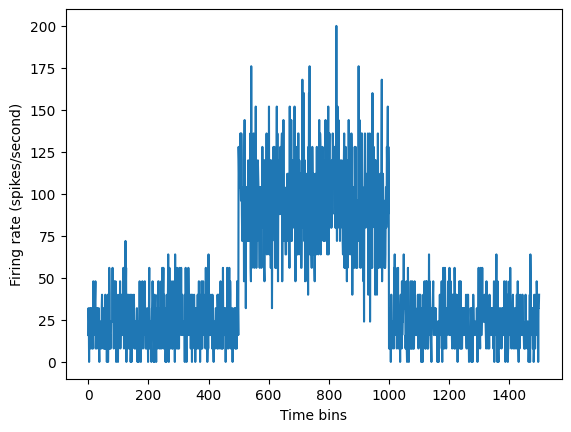

In [ ]:
fig, ax = plt.subplots()

ax.plot(PSTH)
ax.set(xlabel='Time bins',
       ylabel = 'Firing rate (spikes/second)')

6. What is the maximum average firing rate of the neuron? (the max of the PSTH)

In [ ]:
np.max(PSTH)

200.0

## Image Manipulation

The next cell automatically downloads the image (file name dog.jpg) and loads it in directly as numpy array img (should work in either Google Colab or jupyter notebook locally).

Loading in data that exists locally (if you are using a jupyter notebook for example) isn’t as complicated.

You could use plt.imread('dog.jpg', format = 'jpg') If you’d like to download the data locally, you can get it from https://osf.io/35azg/.

In [ ]:
import requests
import io
import matplotlib.pyplot as plt
import numpy as np

r = requests.get('https://osf.io/35azg/download')

img = plt.imread(io.BytesIO(r.content), format = 'jpg')

We will write some code to display the image (we will cover plotting soon!).

1. Print the entry in the third row and second column of the image

In [ ]:
print(img[2, 1])

133


2. Print the second row of the image

In [ ]:
print(img[1, :])

[132 132 132 132 132 132 132 132 134 134 134 134 134 134 134 134 134 134
 134 134 134 134 134 134 134 134 134 134 134 134 134 134 134 134 134 134
 134 134 134 134 133 133 133 133 133 133 133 133 134 134 134 134 134 134
 134 134 133 133 133 133 133 133 133 133 133 133 133 133 133 133 133 133
 132 132 132 132 132 132 132 132 131 131 131 131 131 131 131 131 131 131
 131 131 131 131 131 131 132 132 132 132 132 132 132 132 131 131 131 131
 131 131 131 131 132 132 132 132 132 132 132 132 131 131 131 131 131 131
 131 131 131 131 131 131 131 131 131 131 132 132 132 132 132 132 132 132
 132 132 132 132 132 132 132 132 131 131 131 131 131 131 131 131 131 131
 131 131 131 131 131 131 132 132 132 132 132 132 132 132 132 132 132 132
 132 132 132 132 132 132 132 132 132 132 132 132 131 131 131 131 131 131
 131 131 131 131 131 131 131 131 131 131 130 130 131 131 131 132 132 132
 131 131 131 131 131 131 131 131 131 131 131 131 131 131 131 131 130 130
 130 130 130 130 130 130 130 130 130 130 130 130 13

3. Create a new version of img where the 20 columns on the left and right edge of the image are equal to the minimum of the image.

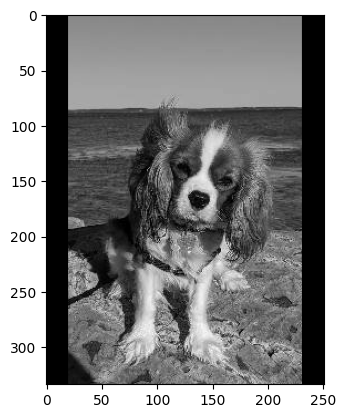

In [ ]:
# First let's copy the image so we don't overwrite our original image
new_img = img.copy()

new_img[:, :20] = np.min(img)
new_img[:, -20:] = np.min(img)

plt.imshow(new_img, cmap = 'gray')

4. Create a new version of the image where the 20 rows on the top and bottom of the image are equal to the maximum of the image.

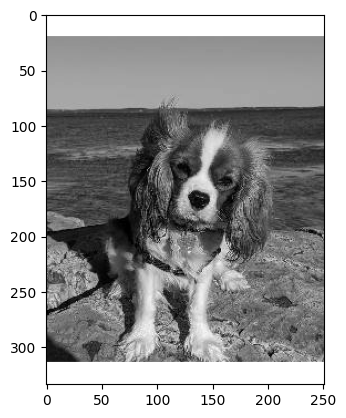

In [ ]:
# First let's copy the image so we don't overwrite our original image
new_img = img.copy()

new_img[:20, :] = np.max(img)
new_img[-20:, :] = np.max(img)

plt.imshow(new_img, cmap = 'gray')

5. Create a new version of the image where every 3rd column is set equal to the average value of the image

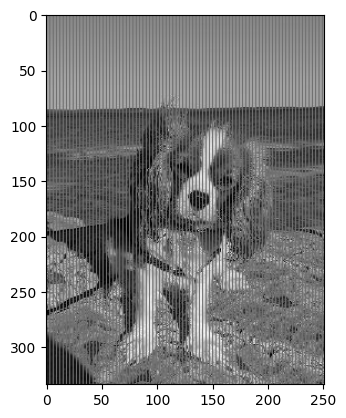

In [ ]:
# First let's copy the image so we don't overwrite our original image
new_img = img.copy()

new_img[:, ::3] = np.mean(img)

plt.imshow(new_img, cmap = 'gray')